## Results from Daysim Trip Demand

In [1]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt

# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# Set main model directory to parent directory
model_dir = os.path.dirname(os.getcwd())
base_dir = r'R:\SoundCast\Inputs\2010\etc'

In [4]:
# Read Model Scenario Results
scen = h5py.File(model_dir + r'/outputs/daysim_outputs.h5','r+')
scen_name = 'Model: 2040'

In [5]:
# Read Base Data
base_file = '/daysim_outputs_seed_trips.h5'

base = h5py.File(base_dir + base_file ,'r+')
base_name = '2010 Base'

In [6]:
container = 'Trip'
fieldname = 'Trip Purpose'
fieldvar = 'dpurp'
labels = {
  0: "None/Home",  
  1: "Work",
  2: "School",
  3: "Escort",
  4: "Personal Business",
  5: "Shopping",
  6: "Meal",
  7: "Social",
  8: "Recreational",
  9: "Medical",
  10: "Change mode"
}
df = pd.DataFrame(np.asarray(base[container][fieldvar]), columns=[fieldvar])
df[fieldname] = [labels[x] for x in df[fieldvar].as_matrix()]
df_base = df.groupby(fieldname).count()[fieldvar]    # Sum by category
df_base = df_base/df_base.sum()     # Convert totals to shares

# Sum by worker type for scenario
df = pd.DataFrame(np.asarray(scen[container][fieldvar]), columns=[fieldvar])
df[fieldname] = [labels[x] for x in df[fieldvar].as_matrix()]
df_scen = df.groupby(fieldname).count()[fieldvar]    # Sum by category
df_scen = df_scen/df_scen.sum()     # Convert totals to shares

In [7]:
trip_p_df = pd.DataFrame([df_scen, df_base]).T
trip_p_df.columns = [ 'Model', 'Base 2010']

## Trip Purpose

In [8]:
display_charts(trip_p_df, title='Trip Rates by Purpose', kind='bar')

In [9]:
trip_p_df.to_clipboard()

## Mode Choice

In [10]:
# Travel Cost by Mode
trip_scen = pd.DataFrame(data={'Household ID': scen['Trip']['hhno'][:],
                                'Travel Time': scen['Trip']['travtime'][:],
                                'Travel Cost': scen['Trip']['travcost'][:],
                                'Travel Distance': scen['Trip']['travdist'][:],
                                'Mode': scen['Trip']['mode'][:],
                                'Purpose': scen['Trip']['dpurp'][:]})

trip_base = pd.DataFrame(data={'Household ID': base['Trip']['hhno'][:],
                                'Travel Time': base['Trip']['travtime'][:],
                                'Travel Cost': base['Trip']['travcost'][:],
                                'Travel Distance': base['Trip']['travdist'][:],
                                'Mode': base['Trip']['mode'][:],
                                'Purpose': base['Trip']['dpurp'][:]})

In [11]:
# pd.pivot_table(data=trip_scen, index='Mode', columns='Purpose', aggfunc='count')['Household ID']
trips_by_mode = trip_scen.groupby('Mode').count()[['Household ID']]

In [12]:
avg_dist_by_mode = trip_scen.groupby('Mode').mean()[['Travel Time']]
avg_dist_by_mode.index = ['Walk', 'Bike', 'SOV', 'HOV2', 'HOV3+', 'Transit', 'School Bus']

In [13]:
display_charts(avg_dist_by_mode, kind='bar', title='Average Travel Time by Mode', ylim=(0, 30))

In [14]:
trip_scen.sum()['Household ID']

26861540374013.0

## Trips by Purpose

In [15]:
df = pd.DataFrame(data=[trip_scen.groupby('Purpose').count()['Household ID']/trip_scen.count()['Household ID'], 
                        trip_base.groupby('Purpose').count()['Household ID']/trip_base.count()['Household ID']]).T
df.columns = ['scen', 'base']


In [16]:
display_charts(df, kind='bar', title='Travel Time by Mode', yticks=False)

## Trip Length

In [17]:
varname = 'travdist'

triplen_base = np.asarray(base['Trip'][varname])
triplen_scen = np.asarray(scen['Trip'][varname])

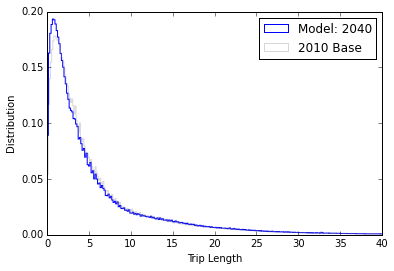

In [18]:
bins = 1000

P.hist(triplen_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(triplen_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,40])    # Cutting the tail at 40 to focus on shorter trip distribution
P.xlabel('Trip Length')
P.ylabel('Distribution')
P.legend()

## Travel Time

In [19]:
varname = 'travtime'

triptime_base = np.asarray(base['Trip'][varname])
triptime_scen = np.asarray(scen['Trip'][varname])

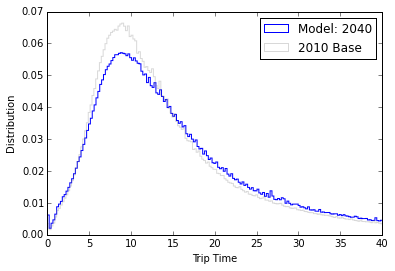

In [20]:
bins = 1000

P.hist(triptime_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(triptime_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,40])    # Cutting the tail at 40 to focus on shorter trip distribution
P.xlabel('Trip Time')
P.ylabel('Distribution')
P.legend()

## Value of Time

In [21]:
varname = 'vot'

vot_base = np.asarray(base['Trip'][varname])
vot_scen = np.asarray(scen['Trip'][varname])

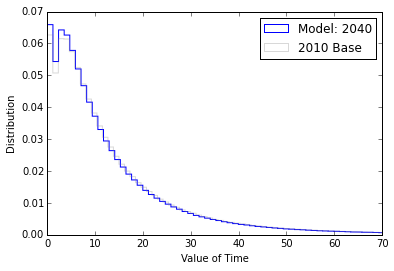

In [22]:
bins = 1000

P.hist(vot_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(vot_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,70])    # Cutting the tail at 70 to focus on shorter trip distribution
P.xlabel('Value of Time')
P.ylabel('Distribution')
P.legend()